In [3]:
import numpy as np
from collections import defaultdict

In [9]:
class Word2Vec:
    def __init__(self,epochs):
        self.n = 15
        self.epochs = epochs
        self.learning_rate = 0.01
        self.window = 3
    
    def prep_training_data(self,corpus):
        self.word_count = defaultdict(int)
        for row in corpus:
            tokens = row.split()
            for word in tokens:
                self.word_count[word]  += 1
        
        self.vocab_count = len(self.word_count.keys())
        self.word_list = sorted(self.word_count.keys(),reverse=False)
        self.word_index = dict((word,i) for word,i in enumerate(self.word_list))
        self.index_word = dict((i,word) for word,i in enumerate(self.word_list))
        
        training_data = []
        
        for row in corpus:
            tokens = row.split()
            sentence_length = len(tokens)
            for i,word in enumerate(tokens):
                word_target = self.onehotvector(word)
                word_context = []
                for j in range(i-self.window,i+self.window+1):
                    if j!=i and j<sentence_length-1 and j>=0:
                        word_context.append(self.onehotvector(tokens[j]))
                training_data.append([word_target,word_context])
        return training_data,self.word_list
        
    
    def forward(self,x):
        h = np.dot(self.w1.T,x)
        u_c = np.dot(self.w2.T,h)
        y = self.softmax(u_c)
        return y,u_c,h
    
    def backward(self,e,h,x):
        dl_w1 = np.outer(h,e)
        dl_w2 = np.outer(x,np.dot(self.w2,e.T))
        self.w1 = self.w1 - (self.learning_rate * dl_w1)
        self.w2 = self.w2 - (self.learning_rate * dl_w2)
        pass

    
    def softmax(self,x):
        exp = np.exp(x - np.max(x))
        return exp/exp.sum(axis=0)
    
        
    def train(self,training_data):
        self.w1 = np.random.uniform(-0.8,0.8,(self.vocab_count,self.n))
        self.w2 = np.random.uniform(-0.8,0.8,(self.n,self.vocab_count))
        
        for i in range(0,self.epochs):
            self.loss = 0
            for word_target,word_context in training_data:
                y_pred,u_c,h = self.forward(word_target)
                EI = np.sum([np.subtract(y_pred,word) for word in word_context],axis=0)
                self.backward(EI,h,word_target)
                self.loss += -np.sum([u_c[word.index(1)] for word in word_context]) + len(word_context) * np.log(np.sum(np.exp(u_c)))
            print("Epoch:",i,"Loss:",self.loss)
        pass
        
    def onehotvector(self,word):
        word_vec = [0 for i in range(0,self.vocab_count)]
        index = self.index_word[word]
        word_vec[index] = 1
        return word_vec
        
    def word_vector(self,word):
        w_index = self.index_word[word]
        vector = self.w1[w_index]
        return vector
    
    def display_onehot(self):
        display_list = {}
        for word in self.word_list:
            one_hot_word = self.onehotvector(word)
            display_list[word] = one_hot_word
        return display_list
        
    
    def word_sim(self,word,topn):
        word_similarity = {}
        index = self.index_word[word]
        vector1 = self.w1[index]
        for i in range(self.vocab_count):
            vector2 = self.w1[i]
            dot_pdt = np.dot(vector1,vector2)
            magnitude = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            similarity = dot_pdt/magnitude
            word_similarity[self.word_index[i]] = similarity
        sim_words = sorted(word_similarity.items(),key=lambda word :word[1],reverse=True)
        print(sim_words[:topn])

In [10]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

word2vec = Word2Vec(8)
training_data,word_list = word2vec.prep_training_data(corpus)
word2vec.train(training_data)

Epoch: 0 Loss: 191.97098257559253
Epoch: 1 Loss: 191.9610841192932
Epoch: 2 Loss: 192.11066690094353
Epoch: 3 Loss: 192.42402044272671
Epoch: 4 Loss: 192.90789399078233
Epoch: 5 Loss: 193.5718694285248
Epoch: 6 Loss: 194.4288482678337
Epoch: 7 Loss: 195.49568198330982


### One hot encoded vectors

In [113]:
print("Sample of training data:",training_data[0:3])
print("\nVocabulary:",word_list)

Sample of training data: [[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]], [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]]]

Vocabulary: ['a', 'berlin', 'capital', 'france', 'germany', 'he', 'is', 'king', 'man', 'paris', 'poland', 'queen', 'she', 'warsaw', 'woman']


In [114]:
#Representation of vocabulary as one hot encoded vector
word2vec.display_onehot()

{'a': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'berlin': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'capital': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'france': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'germany': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'he': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'is': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'king': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'man': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'paris': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'poland': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'queen': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'she': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'warsaw': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'woman': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

### Find similar words

In [92]:
#word2vec.word_vector('he')
word2vec.word_sim('capital',3)

[('capital', 1.0), ('germany', 0.3547085667918233), ('she', 0.34273032534803344)]


### Using gensim for word2vec

In [142]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from matplotlib import pyplot

In [120]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [165]:
model = Word2Vec(common_texts,size=100,window=5,sg=1,min_count=1,alpha=0.025)
# input: common_texts
# size: dimension of vector
# window: size of window
# sg: 1 for skip gram, 0 for cbow
# min_count: specify the minimum frequency of words that should be considered
# alpha: learning rate

### List of words in vocab

In [166]:
list(model.wv.vocab)

['human',
 'interface',
 'computer',
 'survey',
 'user',
 'system',
 'response',
 'time',
 'eps',
 'trees',
 'graph',
 'minors']

### List of vectors

In [167]:
vectors = model[model.wv.vocab]
print(list(model.wv.vocab)[0],vectors[0])

human [ 0.00135937 -0.00142867 -0.00339325 -0.00175615 -0.0008649  -0.00356273
 -0.00087466  0.00218644 -0.00072929  0.00036232  0.00373805 -0.00079552
  0.00356059 -0.00160874 -0.00128751 -0.00417257 -0.00305715  0.00424898
  0.00259151  0.00418183 -0.00050383  0.00097874 -0.00099089  0.00104628
  0.00106695 -0.00123584  0.00051939  0.0048881  -0.00097304  0.00231959
 -0.00347163  0.00334222  0.00212746 -0.00197665  0.00023775  0.00137642
  0.00102056  0.00019557  0.0005028  -0.00388056  0.00198457 -0.0029568
  0.00205558 -0.0018121  -0.00209527 -0.00131441 -0.00074292  0.00370488
  0.0048343  -0.0042116   0.00378423 -0.0019272   0.0047893   0.00089463
  0.00242588 -0.00077963 -0.00034799 -0.00381201 -0.00139947  0.00403043
 -0.00095225 -0.00385556  0.00100864 -0.00069403 -0.00224133  0.00254339
  0.00132734  0.00314969  0.00052397  0.00187758  0.0034403  -0.00365402
 -0.00338135  0.00294793 -0.00351167 -0.00329832  0.00321953  0.00228643
  0.00121263  0.00194458 -0.00098558 -0.001782

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### Project word embeddings in vector space

In [168]:
from sklearn.decomposition import PCA

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


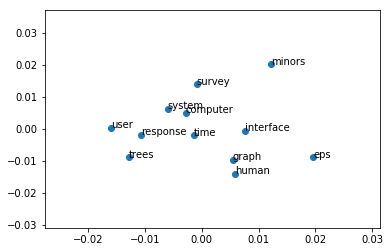

In [169]:
vectors = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

pyplot.scatter(result[:,0],result[:,1])
words = list(model.wv.vocab)

for i,word in enumerate(words):
    pyplot.annotate(word,xy=(result[i,0],result[i,1]))
pyplot.show()

### Using gensim for FastText

In [175]:
from gensim.test.utils import common_texts
from gensim.models import FastText

In [174]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

#### Define FastText model

In [183]:
model = FastText(common_texts,alpha=0.025,window=5,min_count=1,sg=1,min_n=3)

# alpha: Learning Rate
# window: window size for training
# min_count: minimum frequeny of words to be considered
# sg: 1 for skip gram 0 for cbow
# min_n: minimum number of ngrams to be used

###### Check whether a word is in vocabulary

In [199]:
print("computer" in model.wv.vocab)
print("computers" in model.wv.vocab)

print(model['computer'])
# Note: vector for computers is still availables as we have a word computer
print(model['computers'])

True
False
[ 2.1286066e-04  1.0580663e-03 -2.2376154e-03  5.2260025e-04
  5.2873517e-04 -2.3151691e-04 -1.5589088e-04  2.0226570e-04
 -3.1903835e-03  1.6490557e-03 -5.4424683e-05 -2.6254871e-04
 -1.0331337e-03 -8.9286076e-04  1.1941320e-03  5.8650126e-04
 -4.1125005e-04  9.8196918e-04  1.0749986e-03  5.5427826e-04
  8.7111566e-04 -9.9337485e-05 -5.4518157e-04 -8.0522121e-04
 -7.1303942e-04 -2.6796493e-05 -9.9930898e-05  1.0223496e-04
 -1.8784079e-03 -2.1518854e-04 -1.1238595e-03 -1.9411143e-04
 -1.3706944e-04 -1.9029799e-03 -8.3387410e-04  1.0304676e-03
  1.5214080e-03 -2.2575969e-03 -1.2322196e-03  1.9731469e-04
 -1.2151604e-03 -9.5418456e-04 -1.3557049e-03 -4.8256738e-04
 -4.6164484e-04 -2.2357256e-04 -2.5121297e-03 -6.6767773e-04
 -4.7834101e-04 -5.0782121e-04 -1.0249245e-03 -1.5683008e-03
 -8.2716858e-04 -5.4294540e-04  4.2148493e-04  4.8013063e-04
  5.0206837e-04  8.1715034e-04 -4.9071317e-05 -4.0002132e-04
 -3.1691321e-04  9.8143471e-04  9.8174333e-04 -2.7024408e-03
  1.1128940e-

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [200]:
# ngram from sample words also do not match
model['axis']

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyError: 'all ngrams for word axis absent from model'

In [194]:
# Find similarity between words
model.similarity('computer','computers')

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.86958396

In [198]:
# Find most similar words
model.most_similar("humans")

C:\Users\91940\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('human', 0.8487964868545532),
 ('survey', 0.16859087347984314),
 ('response', 0.16203370690345764),
 ('user', 0.003588993102312088),
 ('graph', -0.010339107364416122),
 ('interface', -0.014438483864068985),
 ('eps', -0.042795050889253616),
 ('system', -0.05173743516206741),
 ('computer', -0.053858812898397446),
 ('minors', -0.09194375574588776)]